# Day 2: Integrated exercise 2
Lukas Jarosch & Leonhard Kohleick
</br>
</br>
In this exercise you will need to read a csv file and plot the data in it with seaborn.


## Exercise 1 

You are given a file with physiological data from indian liver disease patients mixed together with healthy individuals (`../additional_data/liver_disease.csv`). The "Dataset" column determines which patients actually have liver disease with "1" indicating sick individuals and "2" indicating healthy individuals.

1. Check out the file
2. Read in the following data from the csv file into *one* dictionary. \
   Make the "Dataset" column more informative by renaming it to "Disease" with the two values "yes" or "no" instead of 1 and 2. Also make sure that your numerical columns contain actual numbers and not just strings!
    - Age
    - Gender
    - Total Proteins
    - Albumin 
    - Disease (in the file it's called `Dataset`) \
The dictionary should be structured like this:  \
` {'Age': [65, 62, ....], 'Gender': ['Female', 'Male',...], 'Total_Proteins [g/dl]': [6.8, 7.5, ...], 'Albumin [g/dl]': [3.3, 3.2, ...], 'Disease': ['No', 'No', ...]}` \
Index position `0` should be the first row with data etc...

In [4]:
from collections import defaultdict
import csv
data = defaultdict(list)
with open("../additional_data/liver_disease.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=";") # we initiate a reader object which removes the delimiter defined and returns a list of String elements
    counter_line = 0
    for row in csv_reader: # Looping through a csv_reader object, the row is now a list with elements
        if counter_line == 0:
            header = row
            header[11] = 'Disease'
            print('The categories in this csv file are:',header)
            counter_line += 1 
        else:
            # append "Age"
            data[header[1]].append(int(row[1]))

            # append "Gender"
            data[header[2]].append(row[2])

            # append "Total_Proteins [g/dl]"
            data[header[8]].append(float(row[8]))

            # append "Albumin [g/dl]"
            data[header[9]].append(float(row[9]))

            # append "Disease"
            if row[11] == '1':    
                data[header[11]].append('No') 
            elif row[11] == '2':
                data[header[11]].append('Yes')

The categories in this csv file are: ['', 'Age', 'Gender', 'Total_Bilirubin [mg/dl]', 'Direct_Bilirubin [mg/dl]', 'Alkaline_Phosphatase [U/l]', 'Alanine_Aminotransferase [U/l]', 'Aspartate_Aminotransferase [U/l]', 'Total_Proteins [g/dl]', 'Albumin [g/dl]', 'Albumin_to_Globulin_Ratio', 'Disease']


In [6]:
print(data)

defaultdict(<class 'list'>, {'Age': [65, 62, 62, 58, 72, 46, 26, 29, 17, 55, 57, 72, 64, 74, 61, 25, 38, 33, 40, 40, 51, 51, 62, 40, 63, 34, 34, 34, 20, 84, 57, 52, 57, 38, 38, 30, 17, 46, 48, 47, 45, 62, 42, 50, 85, 35, 21, 40, 32, 55, 45, 34, 38, 38, 42, 42, 33, 48, 51, 64, 31, 58, 58, 57, 57, 57, 54, 37, 66, 60, 19, 75, 75, 52, 68, 29, 31, 68, 70, 58, 58, 29, 49, 33, 32, 14, 13, 58, 18, 60, 60, 60, 60, 60, 60, 75, 39, 39, 18, 18, 27, 27, 17, 55, 63, 36, 36, 36, 36, 36, 24, 48, 27, 74, 50, 50, 48, 32, 32, 32, 32, 32, 58, 64, 28, 60, 48, 64, 58, 45, 45, 70, 18, 53, 18, 66, 46, 18, 18, 15, 60, 66, 30, 30, 45, 65, 66, 65, 50, 60, 56, 50, 46, 52, 34, 34, 32, 72, 72, 50, 60, 60, 60, 39, 39, 48, 55, 47, 60, 60, 72, 44, 55, 31, 31, 31, 55, 75, 75, 75, 75, 75, 65, 40, 64, 38, 60, 60, 60, 48, 60, 60, 60, 49, 49, 60, 60, 26, 41, 7, 49, 49, 38, 21, 21, 45, 40, 40, 70, 45, 28, 42, 22, 8, 38, 66, 55, 49, 6, 37, 37, 47, 47, 50, 70, 26, 26, 68, 65, 46, 61, 61, 50, 33, 40, 60, 22, 35, 35, 40, 48, 51

## Exercise 2
Use a linear regression plot do determine how Albumin levels correlate with age. Is there a difference between sick and healthy individuals?

*(The code below converts your dictionary into a pandas dataframe that you can use for plotting)*

In [7]:
import pandas as pd

# replace `your_dict` with your dictionary created in Exercise 1
dataframe = pd.DataFrame.from_dict(data)
dataframe

,Age,Gender,Total_Proteins [g/dl],Albumin [g/dl],Disease
0,65,Female,6.8,3.3,No
1,62,Male,7.5,3.2,No
2,62,Male,7.0,3.3,No
3,58,Male,6.8,3.4,No
4,72,Male,7.3,2.4,No
...,...,...,...,...,...
578,60,Male,5.9,1.6,Yes
579,40,Male,6.0,3.2,No
580,52,Male,6.4,3.2,No
581,31,Male,6.8,3.4,No


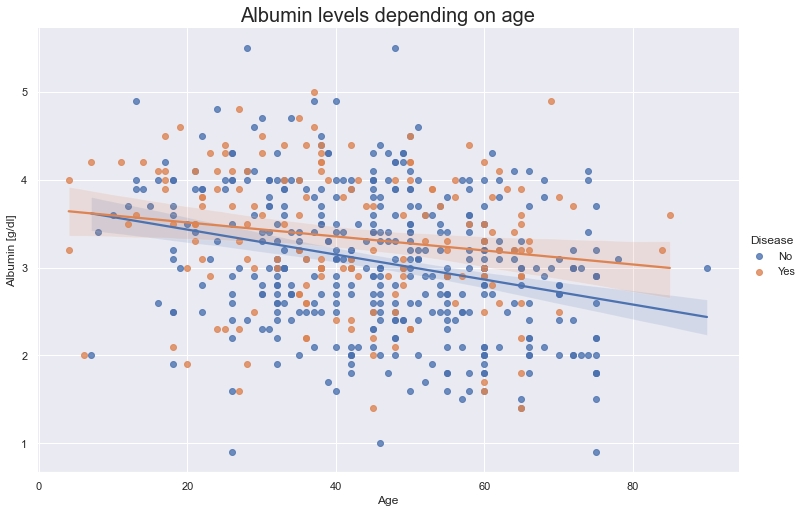

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# this sets the darkgrid theme that we've been using before
sns.set_theme()

sns.lmplot(
    data=dataframe, x="Age", y="Albumin [g/dl]", hue="Disease", aspect=6 / 4, height=7
)

plt.title("Albumin levels depending on age", fontsize=20)

plt.show()

## Exercise 3
Your **female** friend Anna is worried about her raised albumin levels, as she found an analysis of the liver disease dataset online that showed the following boxplot. Can you calm her down by plotting a more accurate representation of the data?

**Bonus**: Also save your new plot to a folder of your choice.

<div>
<img src="../images/boxplot_albumin.png" height="500"/>
</div>

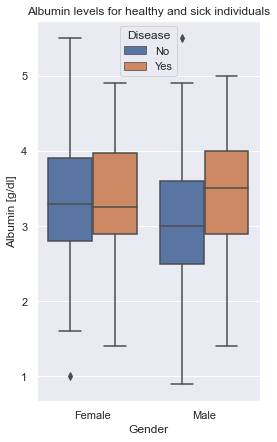

In [12]:
plt.figure(figsize=(4,7))

sns.boxplot(data=dataframe, x="Gender", y="Albumin [g/dl]", hue="Disease")

plt.title("Albumin levels for healthy and sick individuals")

plt.savefig("C:/Users/jarosch/Downloads/boxplot_new.png", dpi=200)

plt.show()

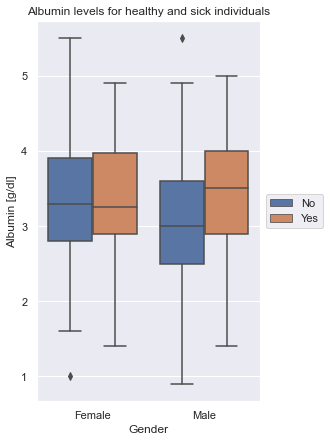

In [13]:
# if you want to be fancy you can move the legend outside of the plot
plt.figure(figsize=(4,7))

sns.boxplot(data=dataframe, x="Gender", y="Albumin [g/dl]", hue="Disease")

plt.title("Albumin levels for healthy and sick individuals")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("C:/Users/jarosch/Downloads/boxplot_new.png", dpi=200, bbox_inches="tight")

plt.show()